In [191]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import functions.img_utils as aug
from sklearn.model_selection import train_test_split

In [192]:
directory = "../data/food-101"
image_list = []
folder_names = []
# Get a list of all subdirectories in the given directory
subdirectories = [f.path for f in os.scandir(directory + "/images") if f.is_dir()]

# Loop through each subdirectory
for subdirectory in subdirectories:
    # Get the folder name
    folder_name = os.path.basename(subdirectory)

    # Get a list of all image files within the subdirectory
    image_files = [f.path for f in os.scandir(subdirectory) if f.is_file() and f.name.endswith(".jpg")]

    # Loop through each image file
    for image_file in image_files:
        # Append the image file to the image_list
        image_list.append(image_file)
        folder_names.append(folder_name)

In [193]:
len(image_list)

101000

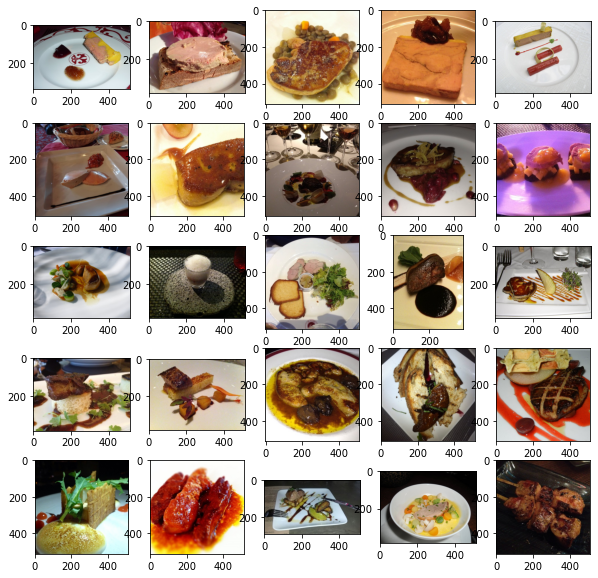

In [194]:
#plot the images
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
axes = ax.flatten()
for i in range(25):
    path=image_list[i]
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img, cmap=None)

In [195]:
paths_names = pd.DataFrame({"path":image_list, "category": folder_names})

In [196]:
train, test = train_test_split(paths_names, train_size=0.80, stratify=paths_names['category'], random_state = 30)

In [197]:
print("Train Length:", len(train))
print("Test Length:", len(test))

Train Length: 80800
Test Length: 20200


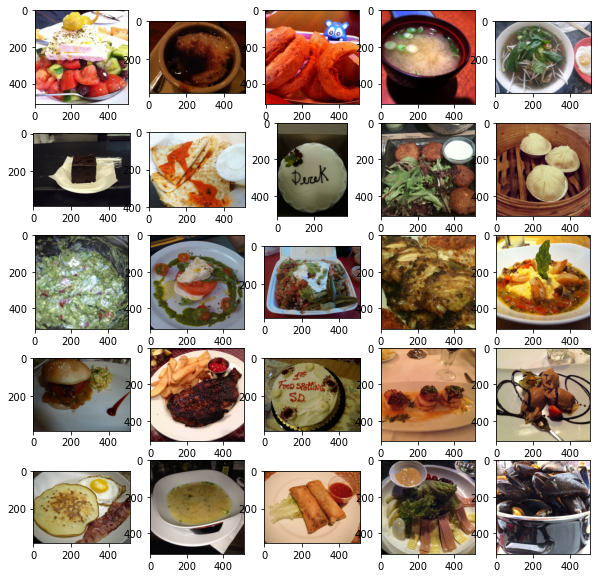

In [198]:
#plot the images
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
axes = ax.flatten()
for i in range(25):
    path=train['path'].iloc[i]
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img, cmap=None)

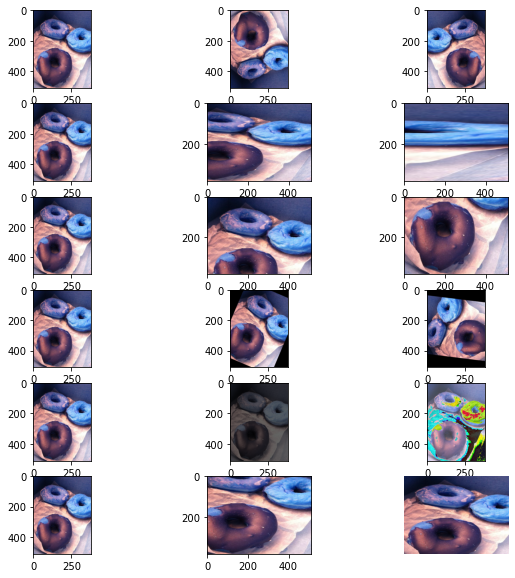

In [200]:
img = cv2.imread(train['path'].iloc[90])
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(10, 10))
axes = ax.flatten()

# Flipping Image
axes[0].imshow(img)
axes[1].imshow(aug.vertical_flip(img,True))
axes[2].imshow(aug.horizontal_flip(img,True))

# Horizontal Shifting Image
axes[3].imshow(img)
axes[4].imshow(aug.horizontal_shift(img,0.5))
axes[5].imshow(aug.horizontal_shift(img,0.9))

# Vertical Shifting Image
axes[6].imshow(img)
axes[7].imshow(aug.vertical_shift(img,0.5))
axes[8].imshow(aug.vertical_shift(img,0.9))

# Rotating Image
axes[9].imshow(img)
axes[10].imshow(aug.rotation(img,45))
axes[11].imshow(aug.rotation(img,90))

# Recolor Image
axes[12].imshow(img)
axes[13].imshow(aug.brightness(img,0.3,2))
axes[14].imshow(aug.channel_shift(img,90))

# Zoom Image
axes[15].imshow(img)
axes[16].imshow(aug.zoom(img,0.2))
axes[17].imshow(aug.zoom(img,0.6))

plt.axis('off')
plt.show()